In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('ev_sales.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,vehicle type,max sales volume,market share,state,Public EV Charging Stations,Average gross income
0,ADAPTED VEHICLE,5,0.004419,Karnataka,136,223175
1,AGRICULTURAL TRACTOR,1,0.000884,Punjab,11,151491
2,BUS,233,0.205941,Maharashtra,317,202130
3,E-RICKSHAW(P),49885,44.091781,Uttar Pradesh,108,65431
4,E-RICKSHAW WITH CART (G),2658,2.349323,Uttar Pradesh,108,65431
5,FORK LIFT,30,0.026516,Gujarat,27,213936
6,GOODS CARRIER,62,0.054800,Tamil Nadu,212,213396
7,LUXURY CAB,11,0.009723,West Bengal,22,121463
8,MAXI CAB,1,0.000884,Haryana,55,247628
9,M-CYCLE/SCOOTER,42461,37.529941,Maharashtra,317,202130


#### dropping vehicle type and state to create decision matrix

In [12]:
df.drop('vehicle type',axis=1,inplace=True)
df.drop('state',axis=1,inplace=True)
df = df.iloc[[3,9,13]]
df

,max sales volume,market share,Public EV Charging Stations,Average gross income
3,49885,44.091781,108,65431
9,42461,37.529941,317,202130
13,5045,4.459117,317,202130


In [13]:
df_min_max_scaled = df.copy()

# matrix normalization 
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = df_min_max_scaled[column] /df_min_max_scaled[column].max()  
    
df_min_max_scaled

,max sales volume,market share,Public EV Charging Stations,Average gross income
3,1.000000,1.000000,0.340694,0.323708
9,0.851178,0.851178,1.000000,1.000000
13,0.101133,0.101133,1.000000,1.000000


In [14]:
# multiplying matrix with 10 for getting values between 0 to 10  
dfx = df_min_max_scaled.mul(10)
dfy = dfx

In [21]:
dfx

3     4.674593
9     9.702355
13    8.202265
dtype: float64

#### applying weight to each feature based on need of orgazination

In [15]:
dfx = dfx.multiply([0.2,1,0.5,0.3],axis=1)
dfy = dfy.multiply([0.35,1,0.4,0.25],axis=1)
dfx

,max sales volume,market share,Public EV Charging Stations,Average gross income
3,2.000000,10.000000,1.70347,0.971123
9,1.702355,8.511777,5.00000,3.000000
13,0.202265,1.011326,5.00000,3.000000


In [16]:
dfx = dfx.drop('market share',axis=1)
dfy = dfy.drop('market share',axis=1)

In [17]:
dfx

,max sales volume,Public EV Charging Stations,Average gross income
3,2.000000,1.70347,0.971123
9,1.702355,5.00000,3.000000
13,0.202265,5.00000,3.000000


In [18]:
dfx = dfx.sum(axis = 1)
dfy = dfy.sum(axis = 1)
dfx

3     4.674593
9     9.702355
13    8.202265
dtype: float64

In [19]:
# 3 segment has been selected. blue stands for E-RICKSHAW(P), red represents M-CYCLE/SCOOTER and green is MOTOR CAR.#
# taking 'market share' as bubble size
x = dfx.values.tolist()
y = dfy.values.tolist()
s = df['market share'].values.tolist()
c = ['blue', 'red', 'green']
s = [a*100 for a in s]

#### based on the graph below we can say that red segment which is M-CYCLE/SCOOTER has to be targeted and MOTOR CAR segment is also suitable for us because of its market share.

(-0.5, 11.0)

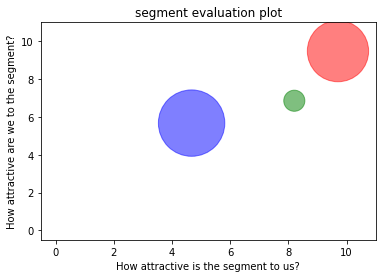

In [20]:
plt.scatter(x,y,s=s,c=c,alpha=0.5)
plt.xlabel('How attractive is the segment to us?')
plt.ylabel('How attractive are we to the segment?')
plt.title('segment evaluation plot')
plt.xlim(-.5, 11)
plt.ylim(-.5,11)